# All hematopoietic dataset

Hematopoiesis dataset from *Weinreb, C., Rodriguez-Fraticelli, A., Camargo, F. D. & Klein, A. M. Science 367, (2020)*. 

This dataset has 3 time points for both the clonal and state measurements. This dataset has ~50000 cells. Running the whole pipeline for the first time could take 5.2 hours in a standard personal computer.
Most of the time (3.3 h) is used for generating the similarity matrix, which are saved for later usage. It also generates output files that amount to 25G storage.

**Key components:**
    
* Part I: Infer transition map using clones from both day 4 and day 6
    
* Part II: Infer transition map using clones from all time points
    
* Part III: Infer transition map using only clones from the last time point

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=3
cs.settings.data_path='LARRY_data_1' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='LARRY_figure_1' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14) # use png to reduce file size. 

Running cospar 0.0.7 (python 3.6.12) on 2021-02-09 19:09.


## Load data

In [3]:
adata_orig=cs.datasets.hematopoiesis_all()

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 49116 × 25289
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

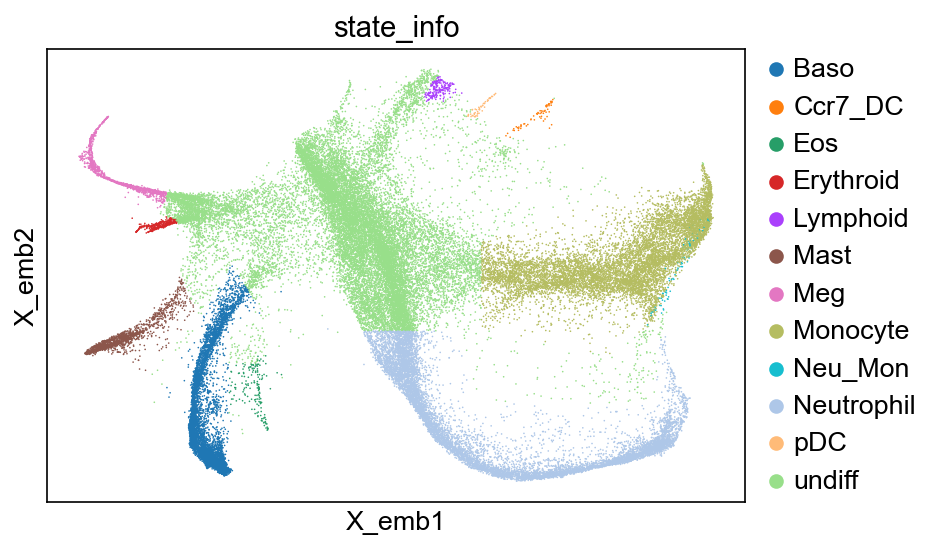

In [5]:
cs.pl.embedding(adata_orig,color='state_info')

In [6]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Availabel clusters: ['Lymphoid', 'Neu_Mon', 'Meg', 'Mast', 'Baso', 'Eos', 'Neutrophil', 'undiff', 'Monocyte', 'Erythroid', 'Ccr7_DC', 'pDC']
Availabel time points: ['4', '6', '2']
Clonal time points: ['4', '6', '2']


### Raw clonal data analysis (without using state information)

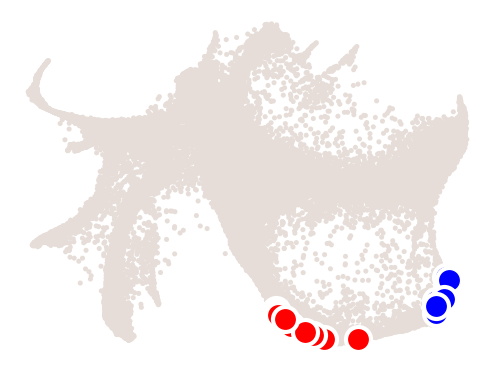

In [7]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1],color_list=['black','red','blue'],point_size=2)

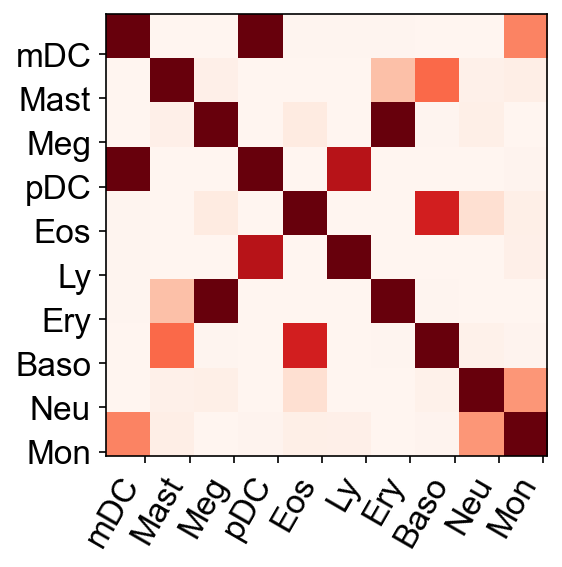

In [8]:
selected_time_point='4'
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.fate_coupling_from_clones(adata_orig,selected_time_point, selected_fates=selected_fates, 
                color_bar=False,rename_selected_fates=celltype_names)

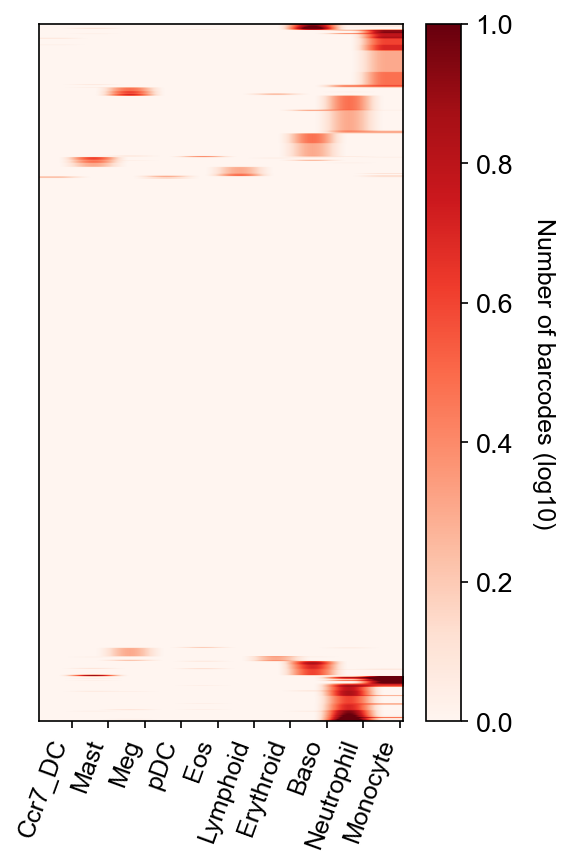

In [9]:
selected_time_point='4'
cs.pl.barcode_heatmap(adata_orig,selected_time_point, selected_fates=selected_fates, color_bar=True)

In [10]:
# clonal_fate_bias,clone_id=cs.pl.clonal_fate_bias(adata_orig,selected_fate='Monocyte',
#             clone_size_thresh=5,N_resampling=100,compute_new=False)

## Part I: Infer transition map using clones from both day 4 and day 6

### Map inference

When first run, it takes 3 h 37 mins, in which 3 h 20 mins are used for computing the similarity matrices and saving these data. It takes only 20 mins for later runs.

-------Step 1: Select time points---------
--> Clonal cell fraction (day 4-6): 0.8093837722229649
--> Clonal cell fraction (day 6-4): 0.8744969393621699
--> Numer of cells that are clonally related -- day 4: 12110  and day 6: 25858
Valid clone number 'FOR' post selection 3047
Cell number=37968, Clone number=3047
-------Step 2: Compute the full Similarity matrix if necessary---------
-------Step 3: Optimize the transition map recursively---------
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  3.6500370502471924
--> Time elapsed:  13.65189504623413
--> Time elapsed:  2.4639596939086914
--> Time elapsed:  16.49741291999817
Compute similarity matrix: load existing data
--> Time elapsed:  2.360732078552246
--> Time elapsed:  6.549123048782349
--> Time elapsed:  1.8333170413970947
--> Time elapsed:  7.555174827575684
Compute similarity matrix: load existing data
--> Time elapsed:  1.488502025604248
--> Time elapsed:  4.99379825

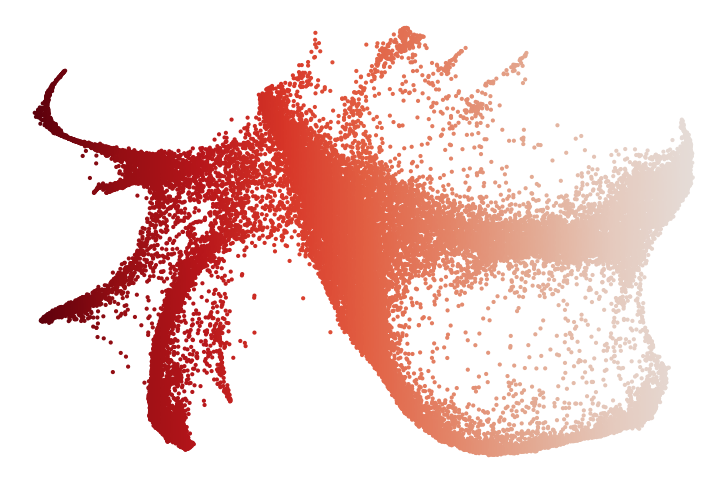

In [11]:
noise_threshold=0.2 # 
selected_clonal_time_points=['4','6']
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,selected_clonal_time_points,smooth_array=[20,15,10],
        noise_threshold=noise_threshold,demulti_threshold=noise_threshold,use_full_Smatrix=True)

### Save or load pre-computed data

In [12]:
save_data=False
if save_data:
    cs.hf.save_map(adata)
    
load_data=False
if load_data:### Plotting
    # updated Jan 27, 2021
    #data_des='LARRY_TwoTimeClone_t*4*6'### Plotting
    data_des='LARRY_OneTimeClone_t*4*6'
    #data_des='LARRY_TwoTimeClone_t*2*4*6'
    adata=cs.hf.load_saved_adata_with_key(data_des)


### Plotting

#### Plotting transition profiles for single cells

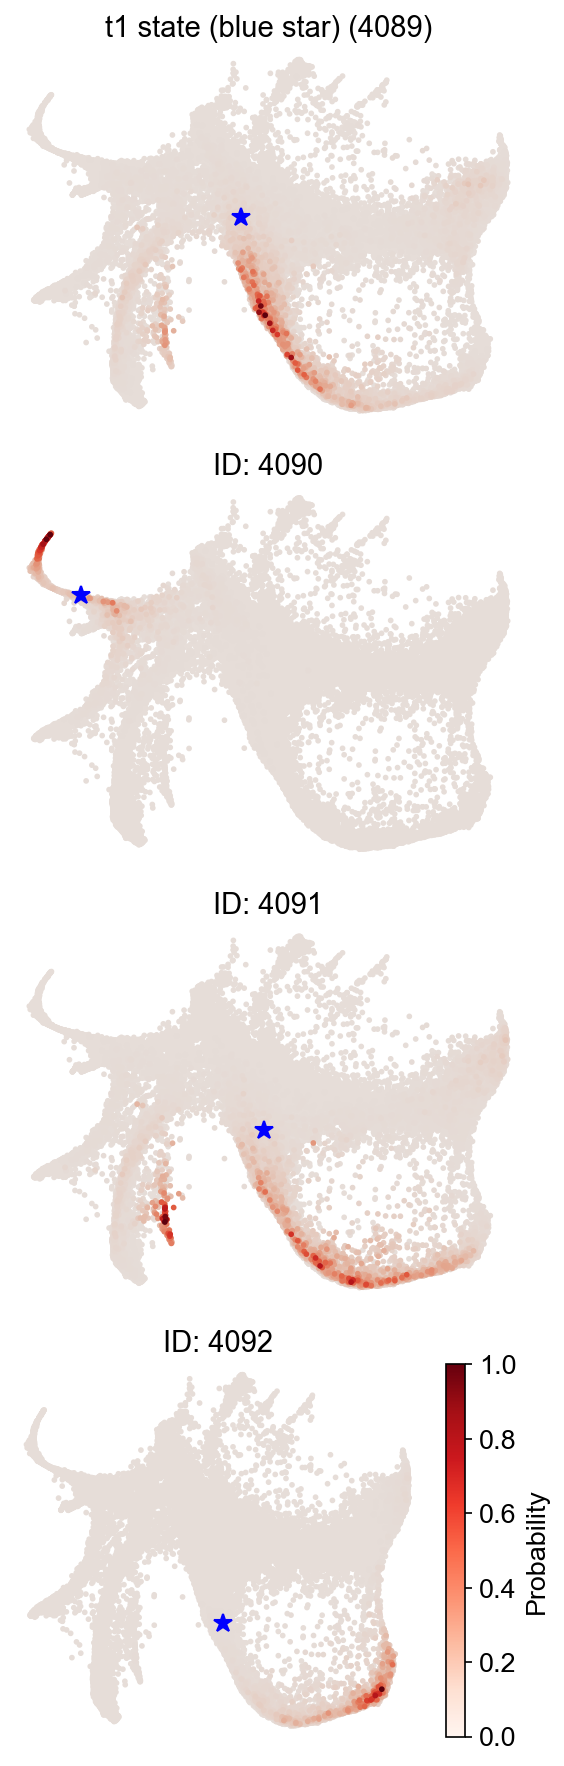

In [13]:
selected_state_id_list=[2,3,4,5]

cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list,
                                    used_map_name='transition_map',map_backwards=False)

#### Fate map

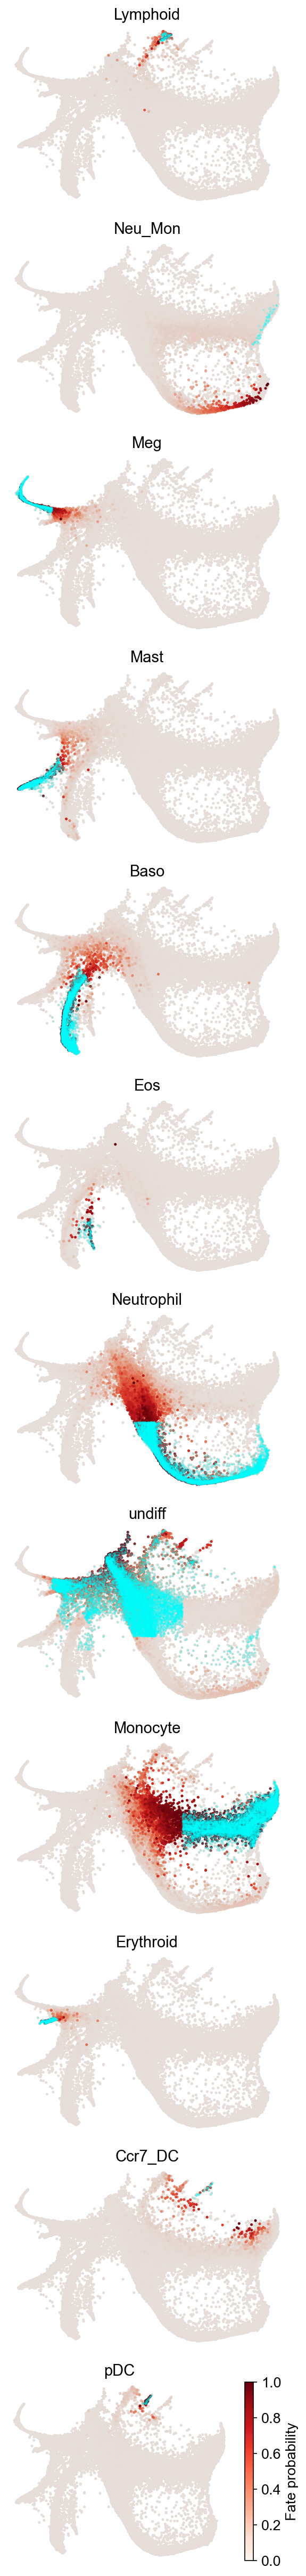

In [14]:
cs.pl.fate_map(adata,selected_fates=[],
               used_map_name='transition_map',map_backwards=True,plot_target_state=True)

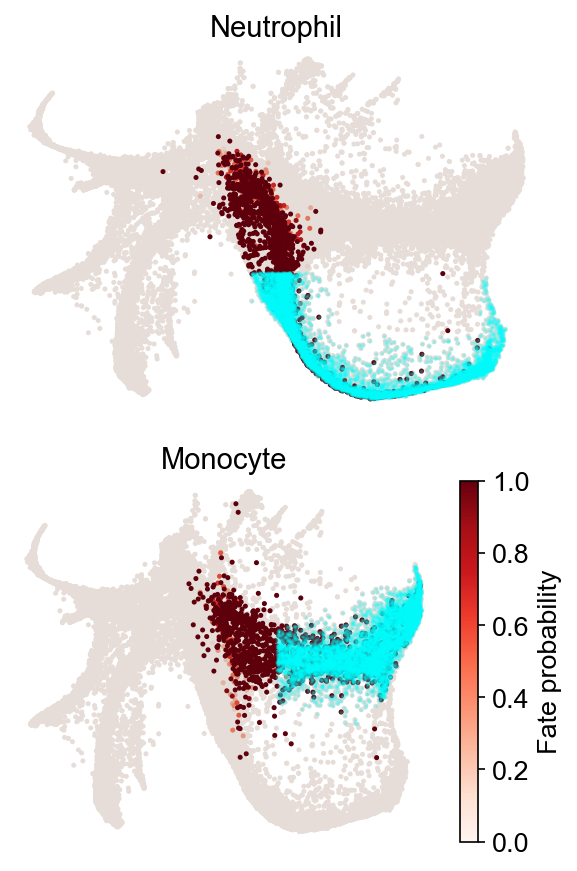

In [15]:
cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],
               used_map_name='intraclone_transition_map',map_backwards=True,plot_target_state=True)

#### Relative fate bias

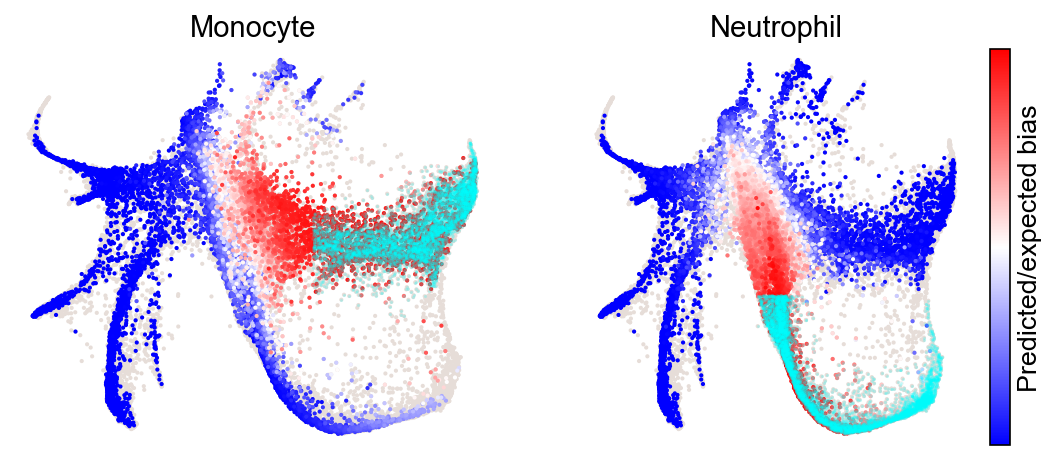

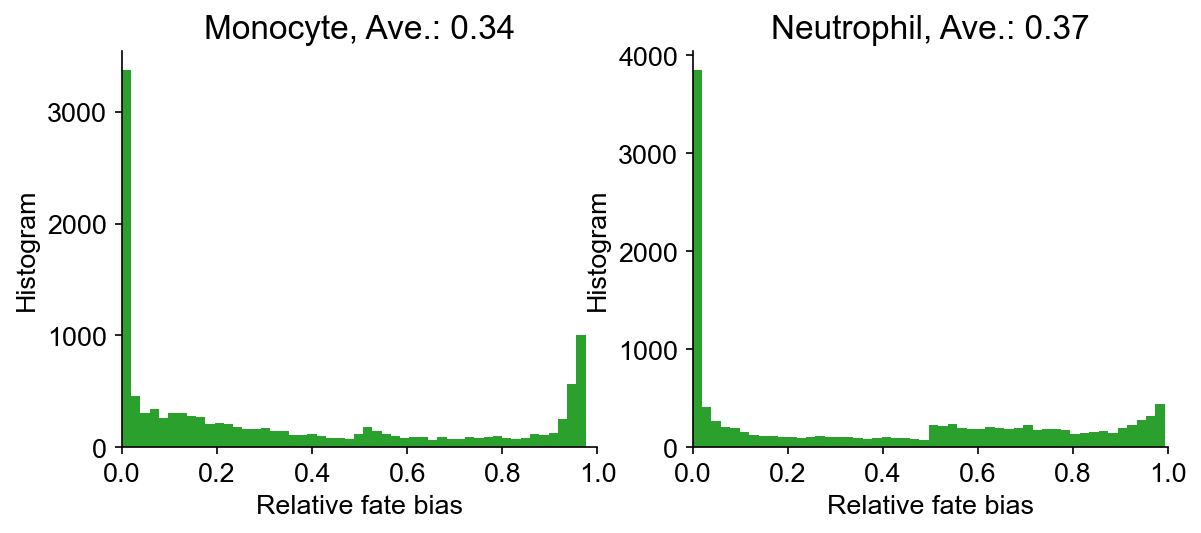

In [16]:
cs.pl.fate_bias_intrinsic(adata,selected_fates=['Monocyte','Neutrophil'],used_map_name='transition_map',
            selected_time_points=['4'],plot_target_state=True,map_backwards=True)

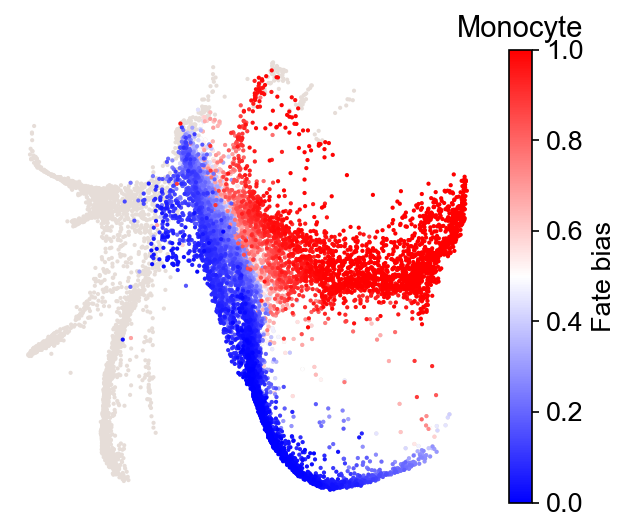

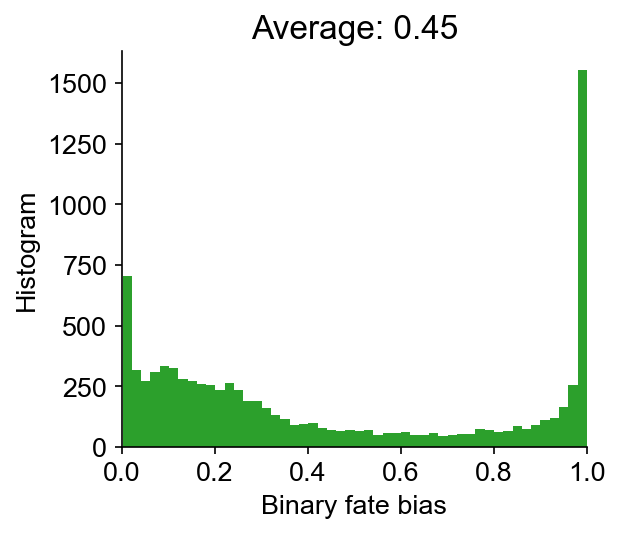

In [17]:
cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['Monocyte','Neutrophil'],used_map_name='transition_map',
            selected_time_points=['4'],plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0.1)

#### Fate coupling of the transition map

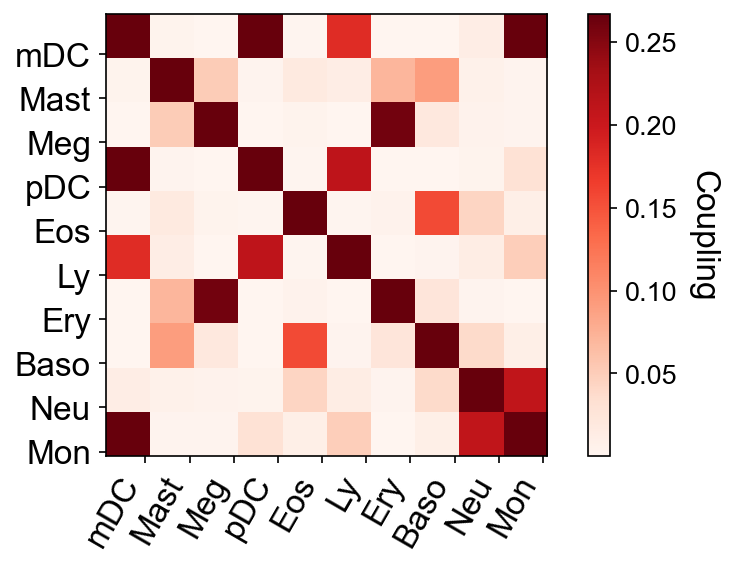

In [18]:
fate_array=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.fate_coupling_from_Tmap(adata,selected_fates=fate_array,used_map_name='transition_map',rename_selected_fates=celltype_names)


#### Dynamic trajectory inference

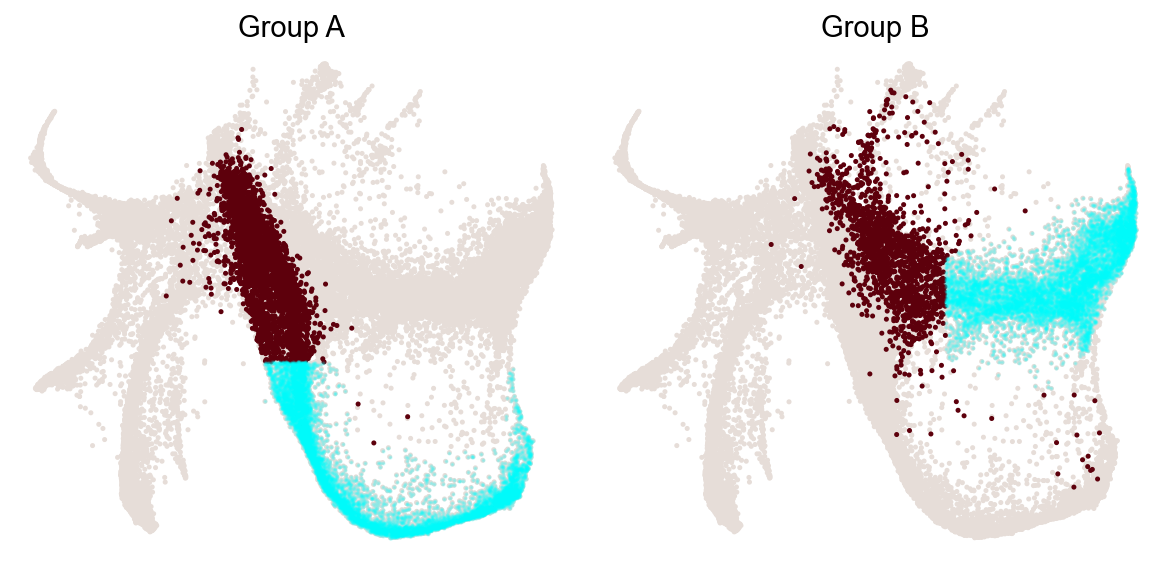

In [19]:
cs.pl.dynamic_trajectory_from_competition_bias(adata, selected_fates=['Neutrophil','Monocyte'], 
 used_map_name='transition_map', map_backwards=True, bias_threshold=0, 
                                               sum_fate_prob_thresh=0.2, avoid_target_states=True)


#### Differential genes for two ancestor groups

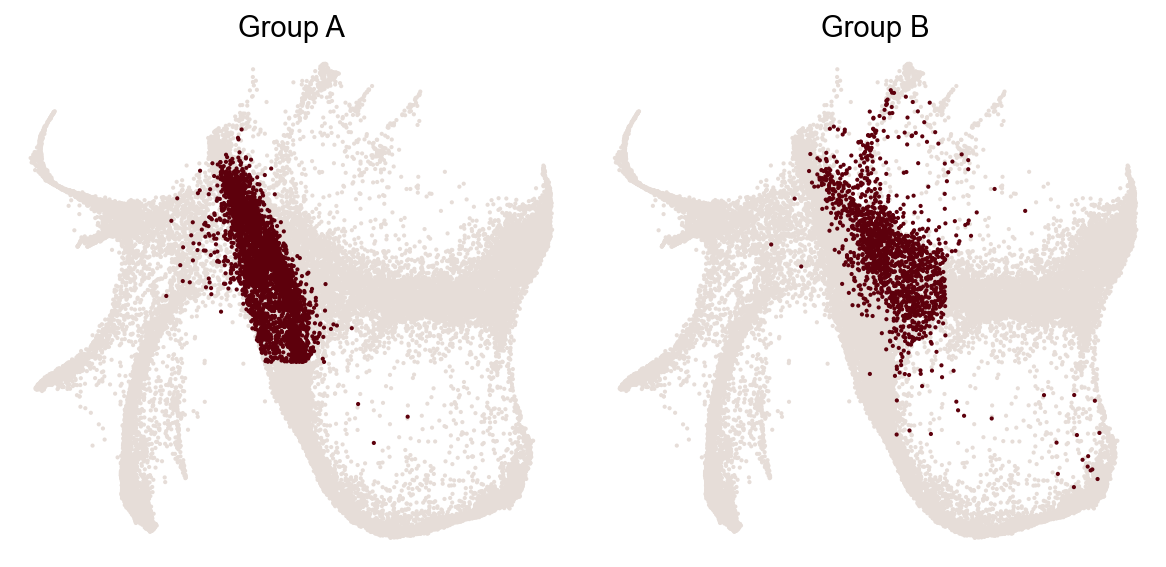

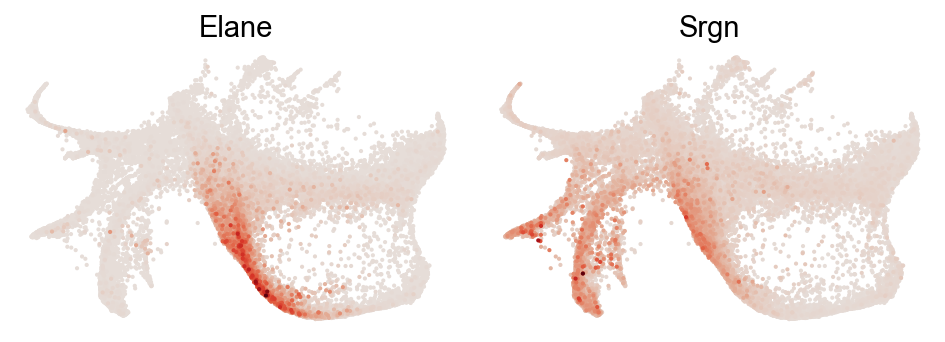

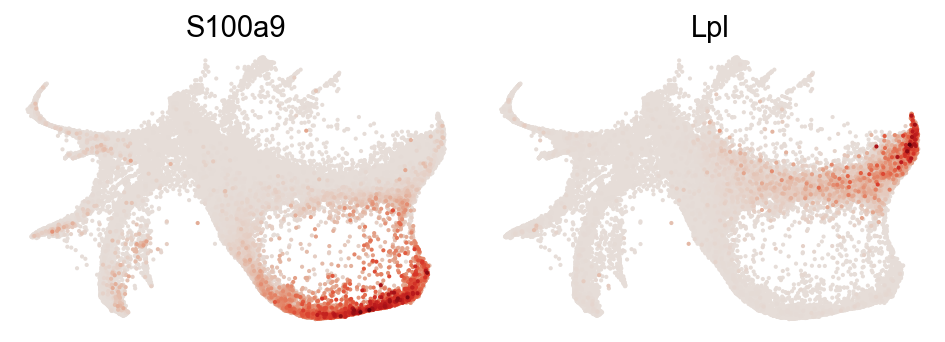

In [20]:
dge_gene_A, dge_gene_B=cs.pl.differential_genes(adata,plot_gene_N=2)

#### Gene trend along the dynamic trajectory

The selected states, combined with the target states are stored as dynamic trajectory at `adata.uns['dynamic_trajectory']`.
We can plot gene trend along this trajectory

/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3.5 x 2.163 in image.
/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: LARRY_figure_1/LARRY_TwoTimeClone_t*4*6_fate_trajectory_pseutoTime_gene_expression_Neutrophil_True.png


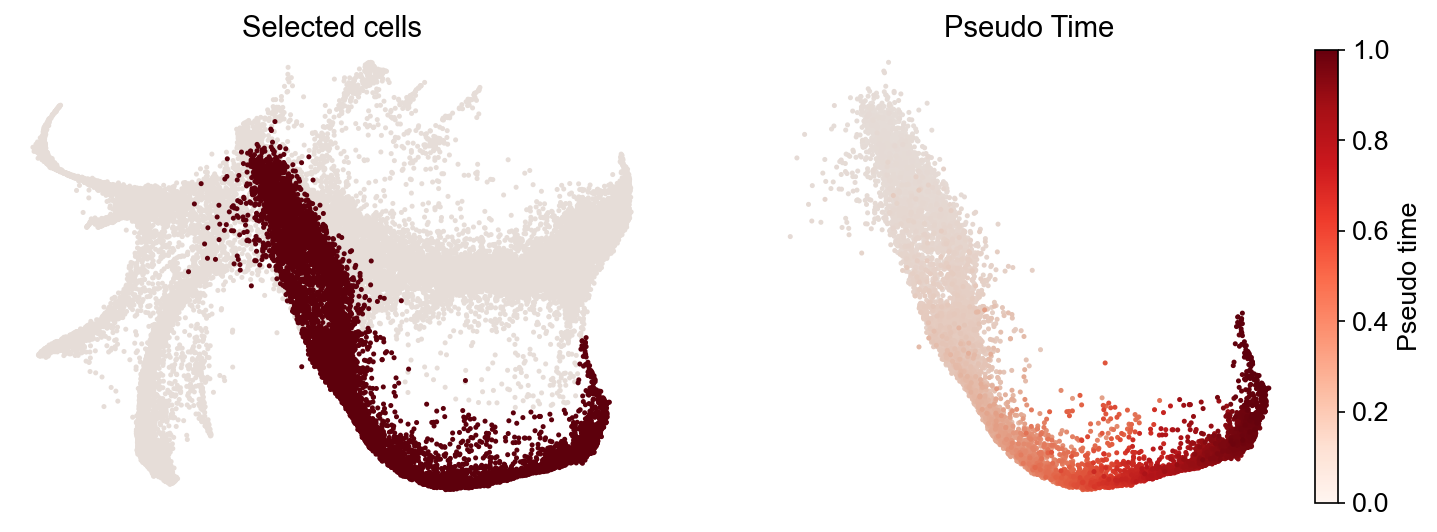

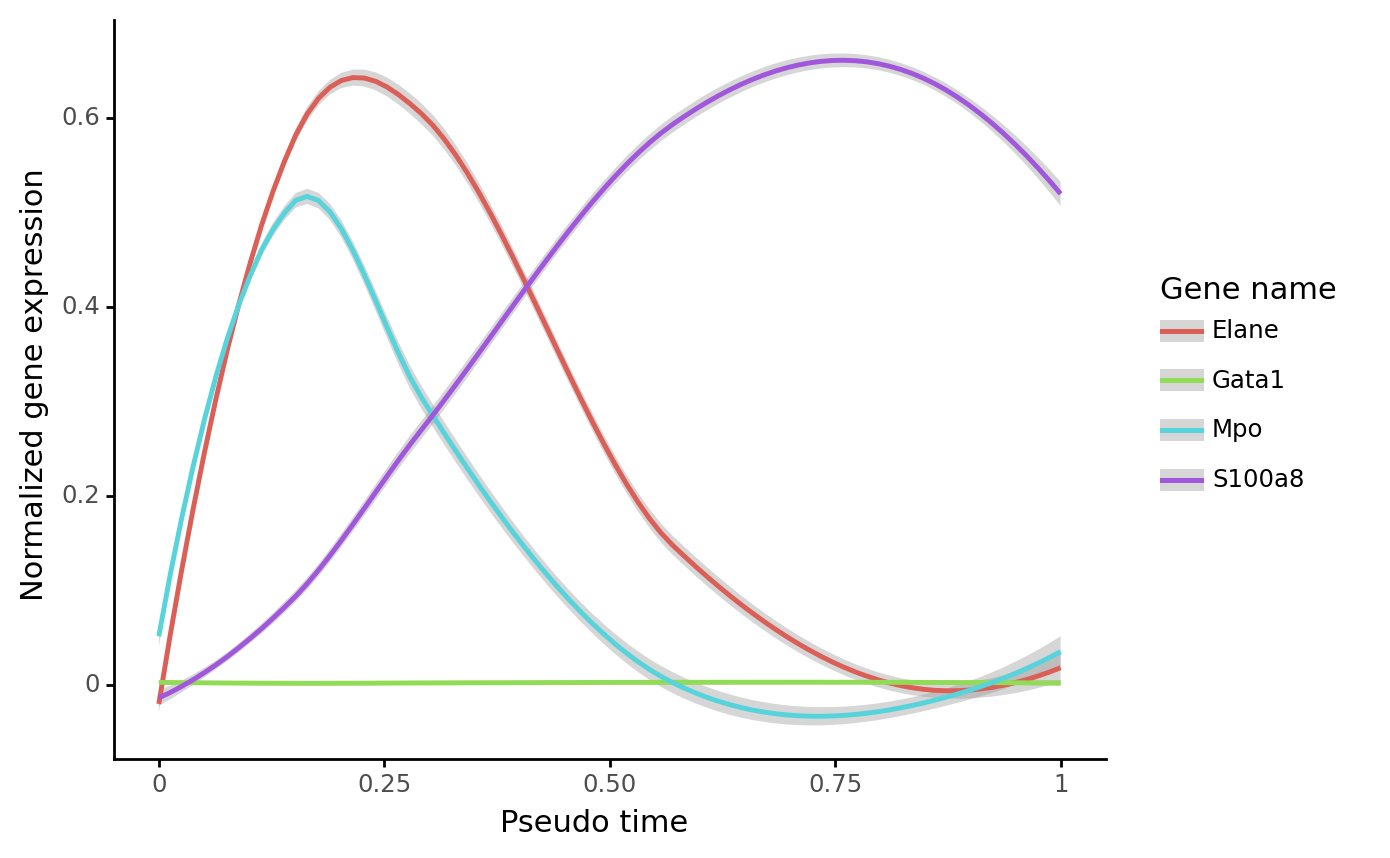

In [21]:
gene_name_list=['Gata1','Mpo', 'Elane', 'S100a8']
selected_fate='Neutrophil'
adata_selected=cs.pl.gene_expression_dynamics(adata,selected_fate,gene_name_list, traj_threshold=0.2,  
      map_backwards=True, invert_PseudoTime=False, include_target_states=True, compute_new=True, 
    fig_width=3.5, gene_exp_percentile=99, n_neighbors=8, plot_raw_data=False, point_size=2)


### Transition map from only clonal information

Used uni-potent clone fraction 0.6307843780767969


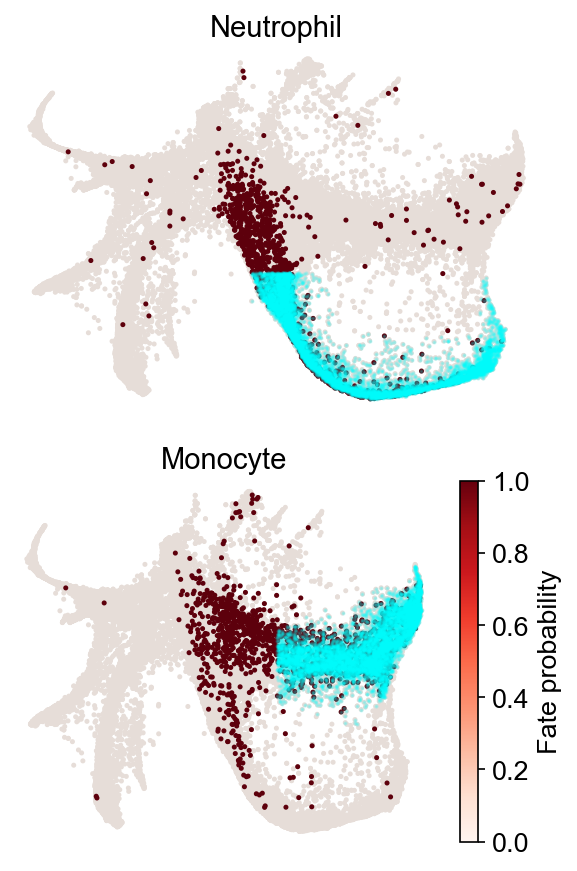

In [22]:
cs.tmap.infer_Tmap_from_clonal_info_alone(adata,method='weinreb')

cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],
               used_map_name='clonal_transition_map',map_backwards=True,plot_target_state=True)

## Part II: Infer transition map using clones from all time points

As the similarity matrices have been pre-computed, this step only takes 20 mins.

-------Step 1: Select time points---------
--> Clonal cell fraction (day 2-4): 0.48396946564885496
--> Clonal cell fraction (day 4-6): 0.8093837722229649
--> Clonal cell fraction (day 4-2): 0.3728111215078198
--> Clonal cell fraction (day 6-4): 0.8744969393621699
--> Numer of cells that are clonally related -- day 2: 2219  and day 4: 5578
--> Numer of cells that are clonally related -- day 4: 12110  and day 6: 25858
Valid clone number 'FOR' post selection 3617
Cell number=41455, Clone number=3617
-------Step 2: Compute the full Similarity matrix if necessary---------
-------Step 3: Optimize the transition map recursively---------
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  3.66806697845459
--> Time elapsed:  11.894880056381226
--> Time elapsed:  4.091122150421143
--> Time elapsed:  14.33942198753357
Compute similarity matrix: load existing data
--> Time elapsed:  3.155916929244995
--> Time elapsed:  9.219360828399658
-

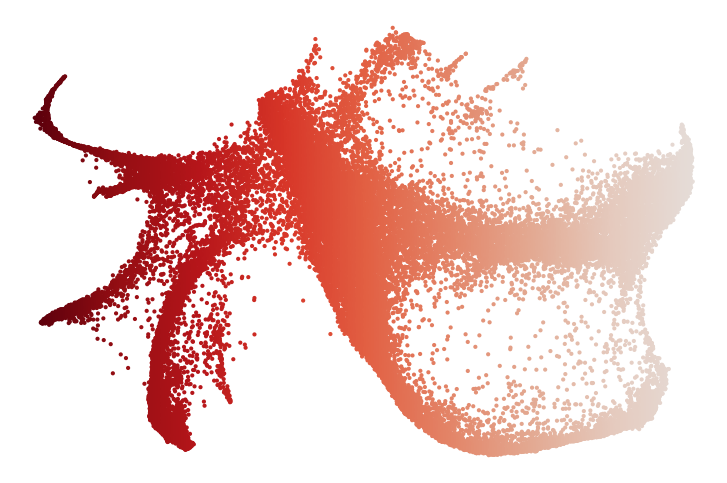

In [23]:
noise_threshold=0.2 # 
selected_clonal_time_points=['2','4','6']
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,selected_clonal_time_points,smooth_array=[20,15,10],
        noise_threshold=noise_threshold,demulti_threshold=noise_threshold,use_full_Smatrix=True)

#### Map trajectory backwards iteratively

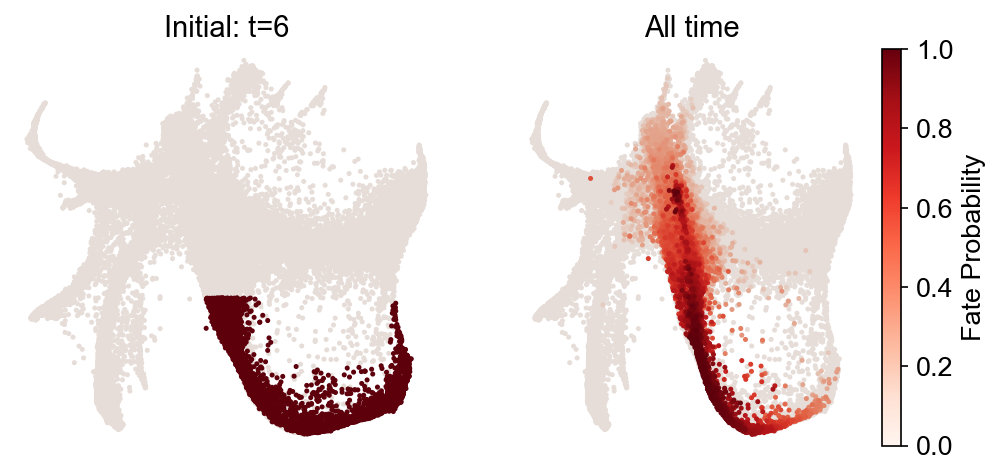

In [24]:
# combine all time points
cs.pl.dynamic_trajectory_via_iterative_mapping(adata, selected_fate='Neutrophil', used_map_name='transition_map',
    map_backwards=True, map_threshold=0.1, plot_separately=False, apply_time_constaint=True, point_size=2)

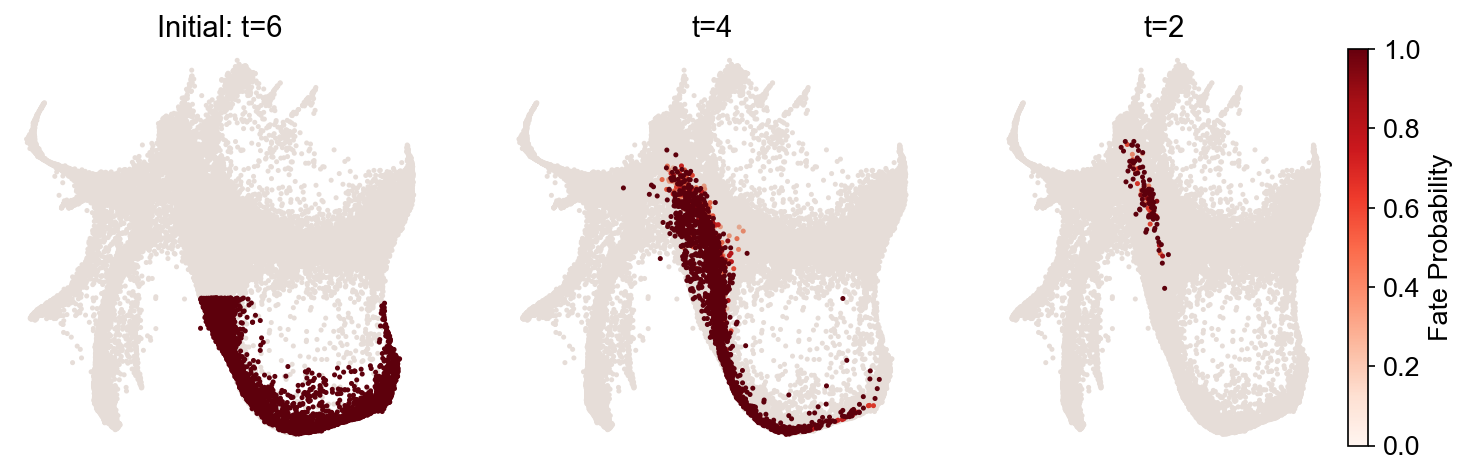

In [25]:
# plot each tiem point separately, use the intra-clone transition map. 
cs.pl.dynamic_trajectory_via_iterative_mapping(adata, selected_fate='Neutrophil', used_map_name='intraclone_transition_map',
    map_backwards=True, map_threshold=0.1, plot_separately=True, apply_time_constaint=True, point_size=2)

#### Gene trend along the trajectory

/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3.5 x 2.163 in image.
/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: LARRY_figure_1/LARRY_TwoTimeClone_t*2*4*6_fate_trajectory_pseutoTime_gene_expression_Neutrophil_True.png


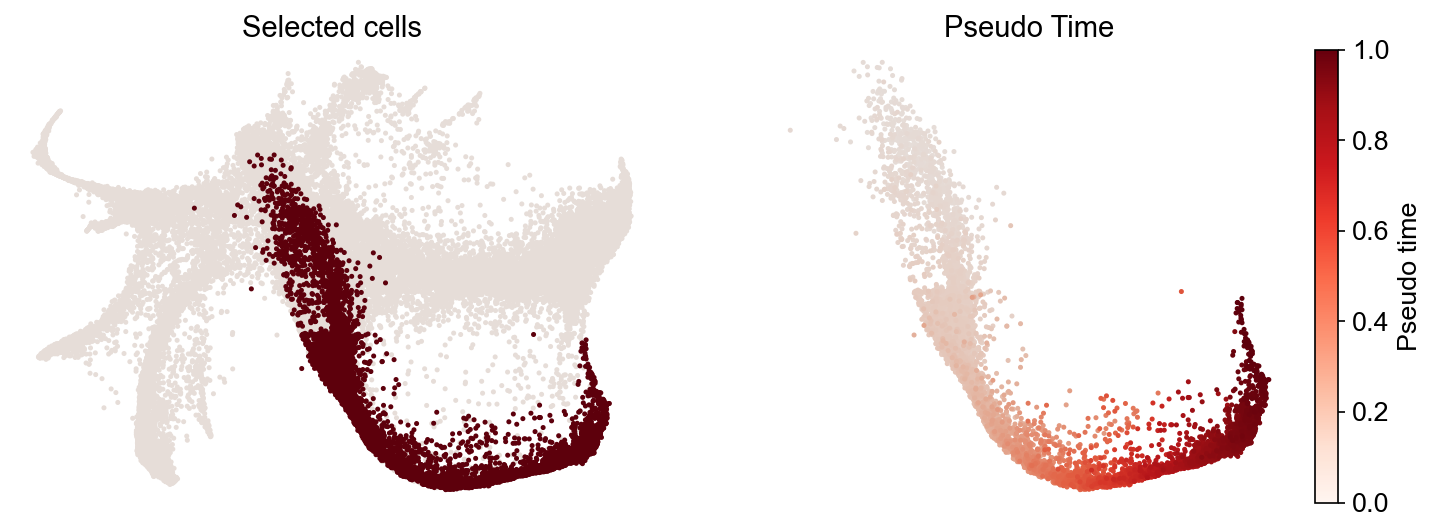

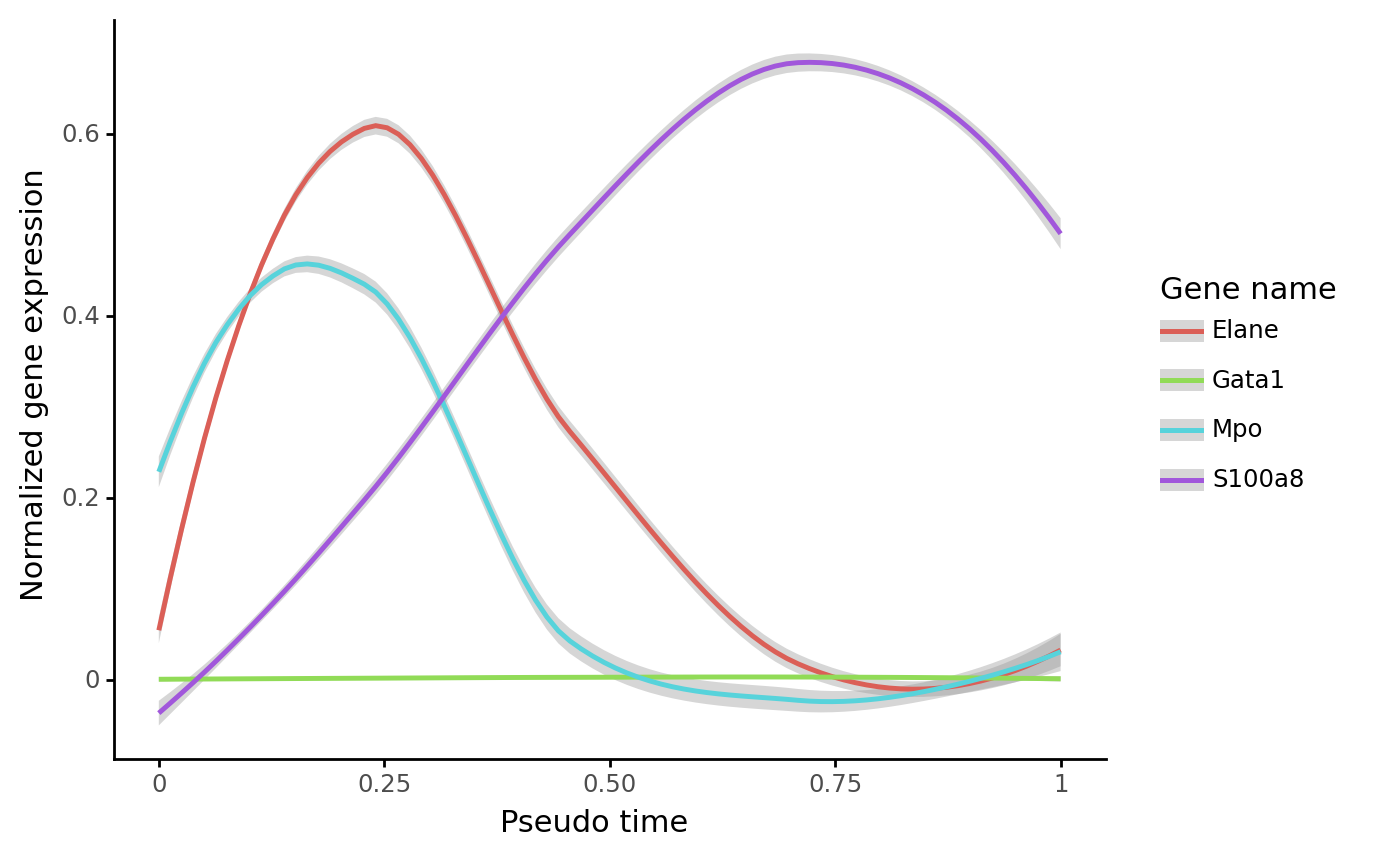

In [26]:
# The results are based on pre-computed dynamic trajectories from a previous step
# better to use the 'intraclone transition map' in the previous step. 

gene_name_list=['Gata1','Mpo', 'Elane', 'S100a8']
selected_fate='Neutrophil'
adata_selected=cs.pl.gene_expression_dynamics(adata,selected_fate,gene_name_list, traj_threshold=0.2,  
      map_backwards=True, invert_PseudoTime=False, include_target_states=True, compute_new=True, 
    fig_width=3.5, gene_exp_percentile=99, n_neighbors=8, plot_raw_data=False, point_size=2)


## Part III: Infer transition map using only clones from the last time point

When run for the firs time, assuming that the similarity matrices are pre-computed, it takes 73 mins. Around 40 mins of which are used to compute the initialized map.

In [27]:
initial_time_points=['4'] #['2','4']
clonal_time_point='6'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points,clonal_time_point,Clone_update_iter_N=1,
        initialize_method='OT',OT_cost='SPD',smooth_array=[20,15,10],noise_threshold=0.2,use_full_Smatrix=True)

-------------------------------New Start--------------------------------------------------
Current time point: 4
-----------Pre-processing and sub-sampling cells------------
----------------
Step 1: Use OT method for initialization
Load pre-computed shortest path distance matrix
Load pre-computed custon OT matrix
----------------
Step 2: Jointly optimize the transition map and the initial clonal states!
Joint optimization that consider possibility of clonal overlap: v2
--> original clone shape: (44531, 5000)
--> After excluding zero-sized clones at t2: (44531, 3949)
Sort clones by size (small to large)
Infer the number of initial cells to extract for each clone in advance
--> Inferring early clonal states: current clone id 0
--> Inferring early clonal states: current clone id 100
--> Inferring early clonal states: current clone id 200
--> Inferring early clonal states: current clone id 300
--> Inferring early clonal states: current clone id 400
--> Inferring early clonal states: curren

#### Plot fate map

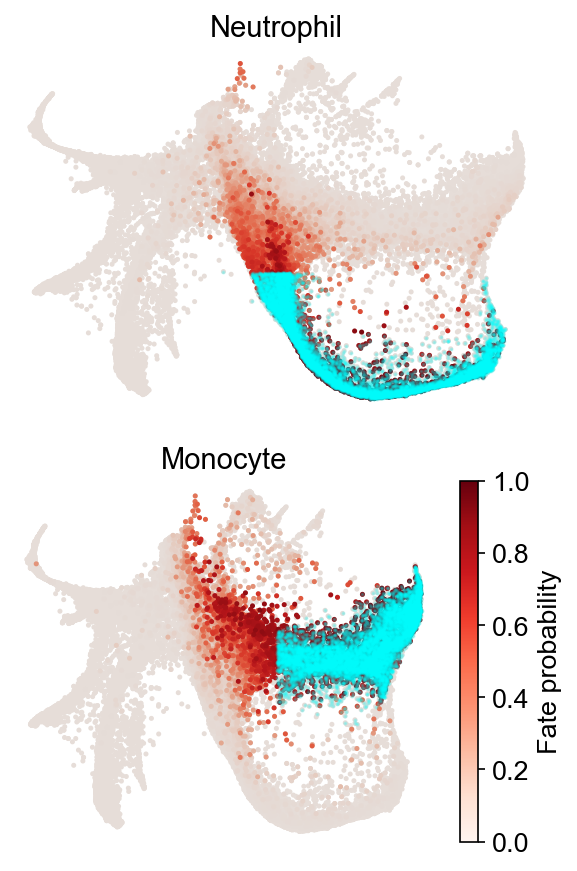

In [28]:
cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],
               used_map_name='transition_map',map_backwards=True,plot_target_state=True)

#### Plot binary fate choice

Use the `transition_map`

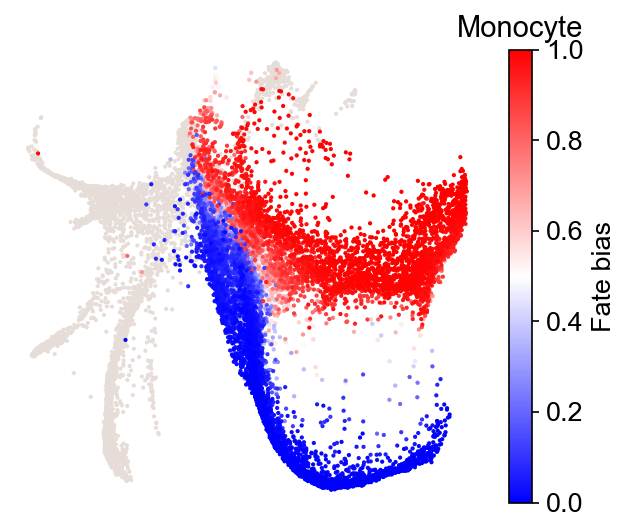

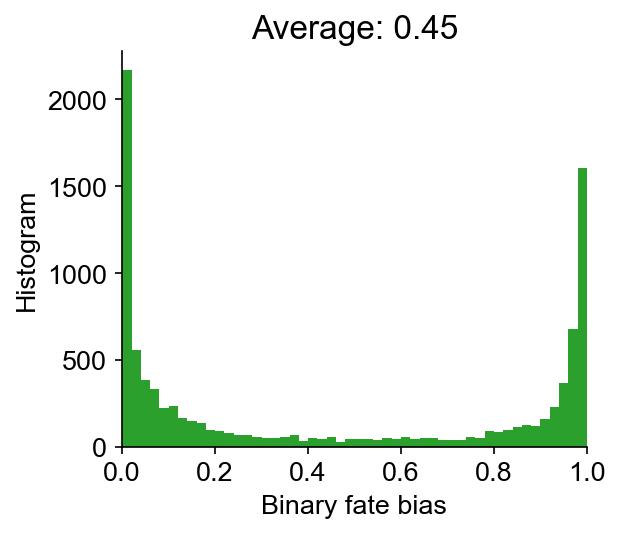

In [29]:
cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['Monocyte','Neutrophil'],used_map_name='transition_map',
            selected_time_points=['4'],plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0.1)

Use `OT_transition_map`

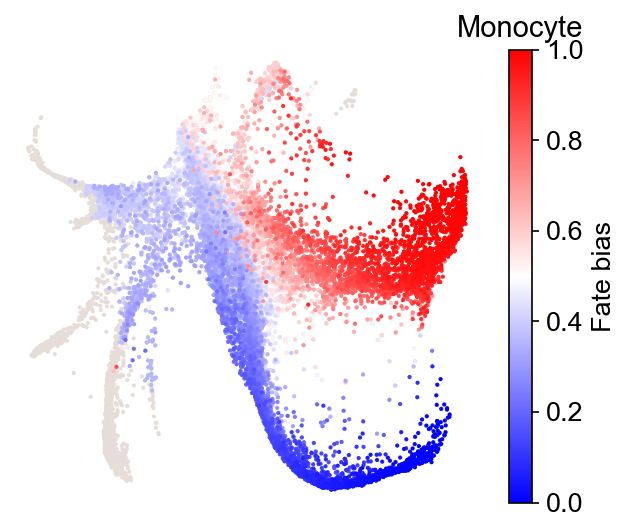

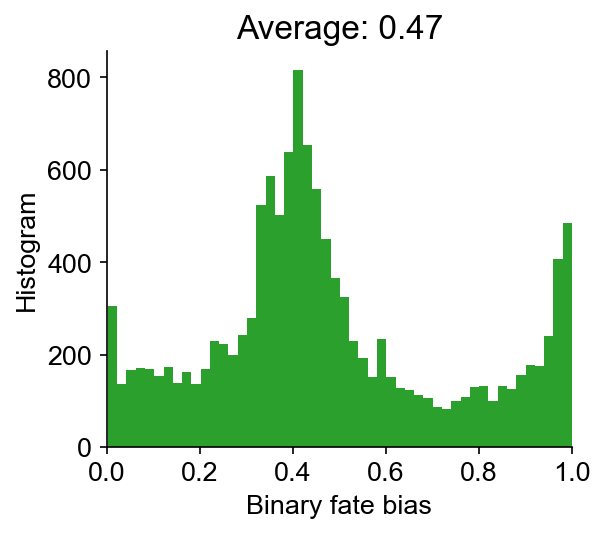

In [30]:
cs.pl.fate_bias_from_binary_competition(adata,selected_fates=['Monocyte','Neutrophil'],
        used_map_name='OT_transition_map',plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0.1)

#### Fate coupling of the transition map

Use the `transition_map`

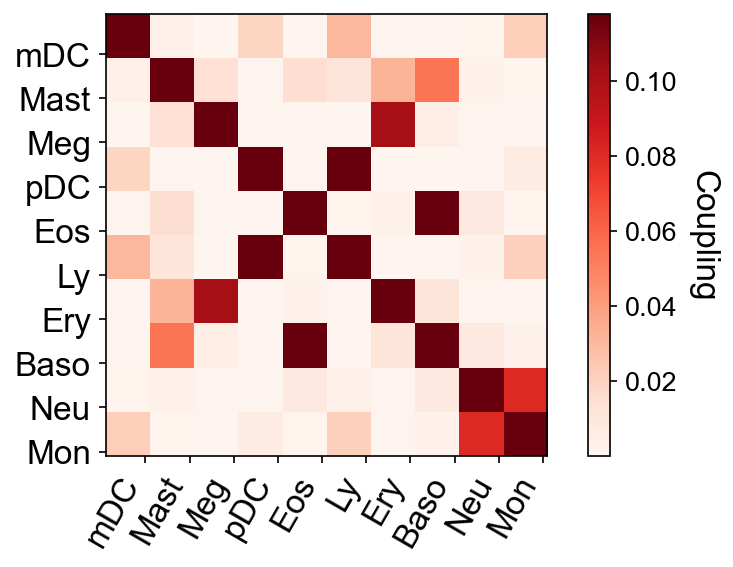

In [31]:
fate_array=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.fate_coupling_from_Tmap(adata,selected_fates=fate_array,used_map_name='transition_map',
                        rename_selected_fates=celltype_names,color_bar=True)


Use the `OT_transition_map`

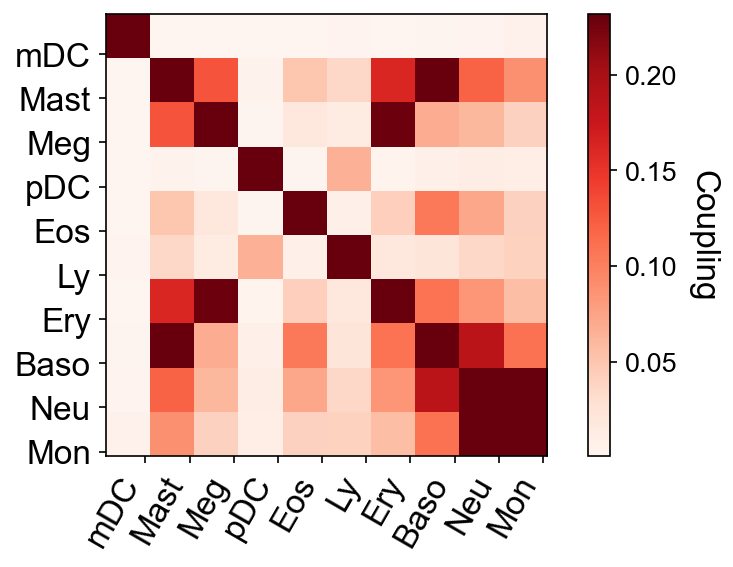

In [32]:
fate_array=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
cs.pl.fate_coupling_from_Tmap(adata,selected_fates=fate_array,used_map_name='OT_transition_map',
                        rename_selected_fates=celltype_names,color_bar=True)


#### Dynamic trajectory inference

From `transition_map`

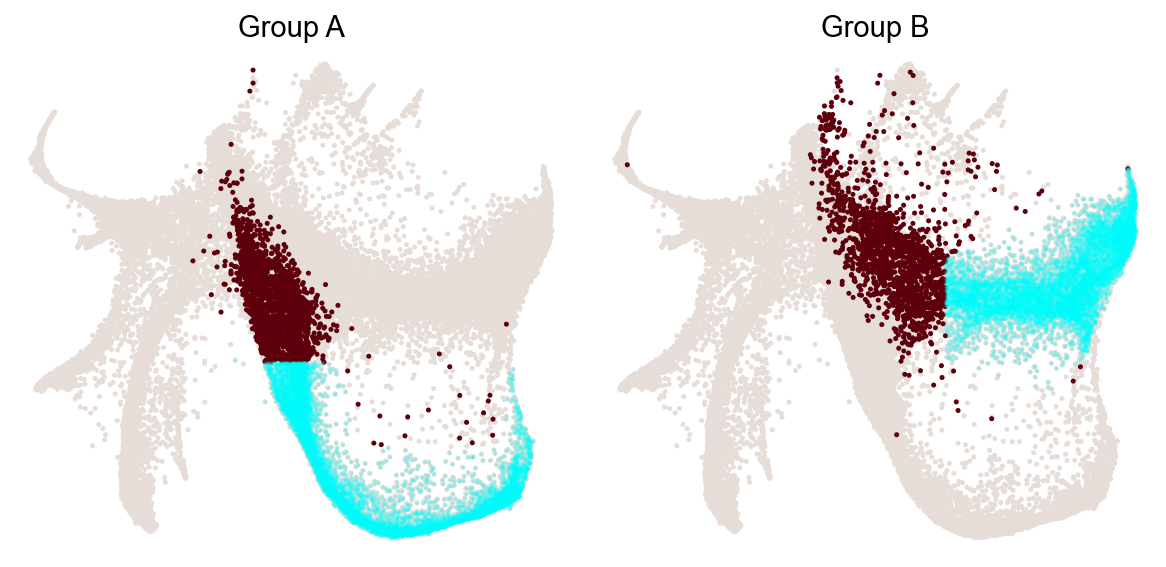

In [33]:
cs.pl.dynamic_trajectory_from_competition_bias(adata, selected_fates=['Neutrophil','Monocyte'], 
 used_map_name='transition_map', map_backwards=True, 
    bias_threshold=0, sum_fate_prob_thresh=0.2, avoid_target_states=True)

From `OT_transition_map`. We change sum_fate_prob_thresh=0.3 to get rid of low-probability states.

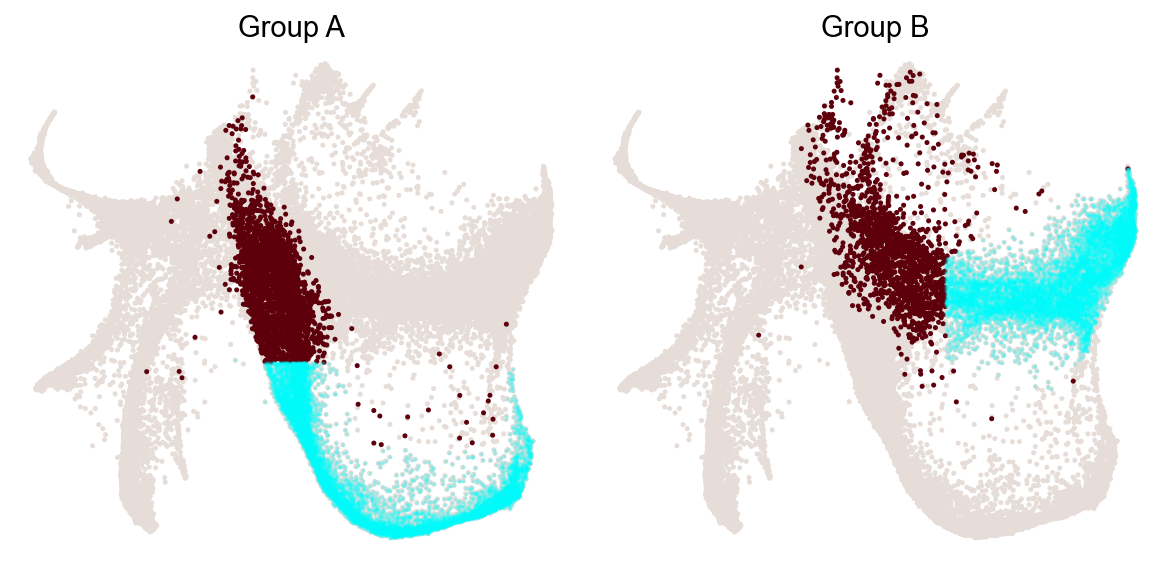

In [34]:
cs.pl.dynamic_trajectory_from_competition_bias(adata, selected_fates=['Neutrophil','Monocyte'], 
 used_map_name='OT_transition_map', map_backwards=True, 
    bias_threshold=0, sum_fate_prob_thresh=0.3, avoid_target_states=True)

We can see that the `OT_transition_map`, which is constructed using the shortest path distance 
(not WOT map that uses gene expression distance), still has the potential to recover the ealy 
fate bias boundary, although the boundary is much more blurry than what coherent sparsity 
optimization would predicted.